In [2]:
data(airquality)
air <- airquality
head(air)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [3]:
dim(air)

[1] 153   6

In [4]:
base <- lm(Ozone ~ ., data=air)
summary(base)


Call:
lm(formula = Ozone ~ ., data = air)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.014 -12.284  -3.302   8.454  95.348 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -64.11632   23.48249  -2.730  0.00742 ** 
Solar.R       0.05027    0.02342   2.147  0.03411 *  
Wind         -3.31844    0.64451  -5.149 1.23e-06 ***
Temp          1.89579    0.27389   6.922 3.66e-10 ***
Month        -3.03996    1.51346  -2.009  0.04714 *  
Day           0.27388    0.22967   1.192  0.23576    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.86 on 105 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.6249,	Adjusted R-squared:  0.6071 
F-statistic: 34.99 on 5 and 105 DF,  p-value: < 2.2e-16


In [13]:
coef(base)

(Intercept)      Solar.R         Wind         Temp        Month          Day 
-64.11632110   0.05027432  -3.31844386   1.89578642  -3.03995664   0.27387752

In [25]:
ITERS <- 1000
bootstrap <- function(data) {
    n <- dim(data)[2]
    m <- dim(data)[1]
    coef.m <- matrix(nrow=n, ncol=ITERS)
    for (i in 1:ITERS) {
        if (i %% 10 == 0) {cat(i, ' ')}
        samp <- data[sample(1:m, size=m, replace=T), ]
        mod <- lm(Ozone ~ ., data=samp)
        coef.m[, i] <- coef(mod)
    }
    coef.m
}

In [27]:
coef.m <- bootstrap(air)

10  20  30  40  50  60  70  80  90  100  110  120  130  140  150  160  170  180  190  200  210  220  230  240  250  260  270  280  290  300  310  320  330  340  350  360  370  380  390  400  410  420  430  440  450  460  470  480  490  500  510  520  530  540  550  560  570  580  590  600  610  620  630  640  650  660  670  680  690  700  710  720  730  740  750  760  770  780  790  800  810  820  830  840  850  860  870  880  890  900  910  920  930  940  950  960  970  980  990  1000  

In [29]:
rownames(coef.m) <- c('int', 'solar', 'wind', 'temp', 'month', 'day')

In [31]:
coef.m[, 1:10 ]

int,-102.90053382,-45.51849624,-86.17451517,-21.79578851,-64.00995510,-80.51199138,-31.89820400,-72.69686596,-63.38494976,-64.20065234
solar,0.03890391,0.06436708,0.02509992,0.04540103,0.05553655,0.02896435,0.03897832,0.04195324,0.02602836,0.01773862
wind,-1.82092427,-4.57605662,-2.86545993,-4.58425800,-3.05973233,-2.09611691,-3.57363278,-4.29378185,-2.41183096,-2.47317993
temp,2.06664990,1.56078437,2.21984347,1.38030211,1.79639079,2.31842147,1.73638757,2.16091787,1.93909503,1.99630670
month,-1.63001173,-1.32137874,-4.02938882,-1.48935193,-2.08767558,-6.45562849,-5.61172234,-3.69116875,-4.96994119,-4.37719804
day,0.28682132,0.50810353,0.48891916,0.43948649,0.14059304,0.27221269,0.62181079,0.36693036,0.55418514,0.19877811


In [39]:
q <- apply(coef.m, 1, quantile, prob=c(0.0275, 0.5, 0.975))
q

,int,solar,wind,temp,month,day
2.75%,-102.36147,0.01346065,-5.010158,1.500461,-5.6063096,-0.1889721
50%,-65.85285,0.04886787,-3.287873,1.912835,-3.0370663,0.2787371
97.5%,-24.76393,0.09003771,-1.854335,2.338900,-0.3091687,0.7421099


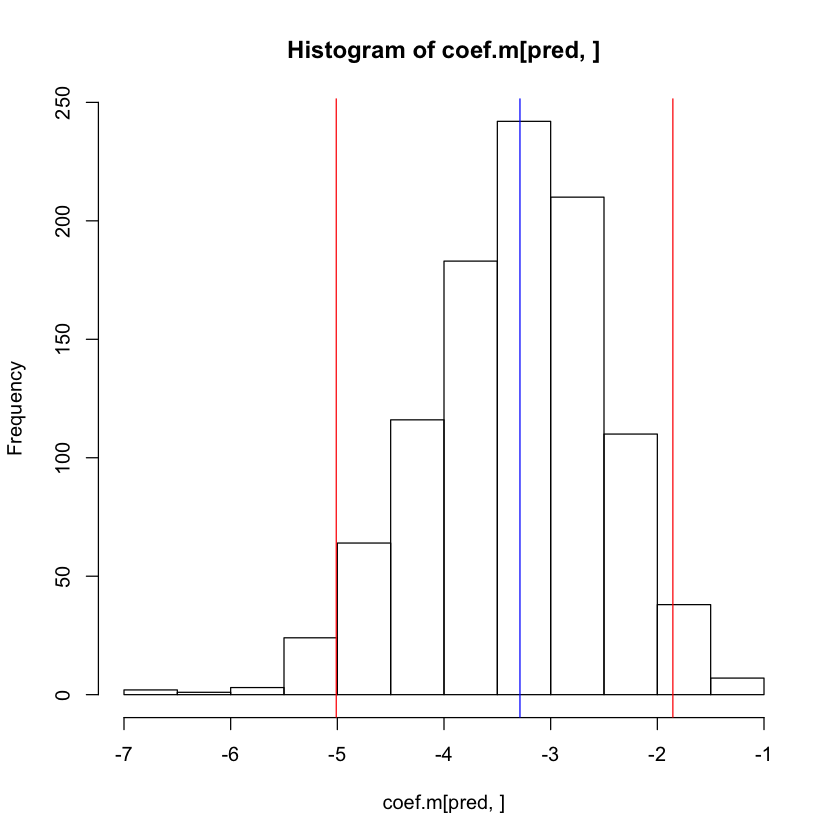

In [42]:
pred <- 'wind'
hist(coef.m[pred, ])
abline(v=q['2.75%', pred], col=2)
abline(v=q['97.5%', pred], col=2)
abline(v=q['50%', pred], col=4)